## Imports

In [1]:
from python_files.splitting_silver_data import read_from_hf_and_save_to_pkl, divide_and_conquer
from python_files.analysing_results_1 import inter_annotator, silver_data_metrics
from python_files.in_depth_analysis_1 import plotting_wikiann
from python_files.fewnerd_processing import data_processing

## Paths for data sources

In [2]:
wikiann_link="hf://datasets/unimelb-nlp/wikiann/"
wikiann_subset="data-files_and_results/subset_of_wikiann.pkl"
manual_analysis_results="data-files_and_results/annotations_Results.csv"

fewnerd_raw_data="data-files_and_results/fewnerd-data/train.txt"
fewnerd_processed_output="data-files_and_results/fewnerd_train.conll"

colors=["managua", "Blues"]

# Approach 1: manually re-annotating silver data
Take a subset of the silver dataset WikiAnn, and divide it between the group members (with overlap s.t. each sentence gets annotated by 2 people)

Beware that this cell fetches the data from huggingface and saves it as a pkl in our repository. For this reason, it has been written into markdown, and can be ignored in the future.
```
read_from_hf_and_save_to_pkl(link=wikiann_link, save_as=wikiann_subset, subset_size=2000)
```

In [3]:
#Split the data between group members
silver_data_list = divide_and_conquer(pkl_link=wikiann_subset, grp_mmbrs=['Am', 'Li', 'Mi', 'Zo'])

#The above function creates an excel sheet for each group member, which is then manually annotated, and combined with the others' results
# The gathered results are read in below

## Inter-annotator results
To Interpret Kappa Score:
- < 0.2: Poor agreement
- 0.2 - 0.4: Fair
- 0.4 - 0.6: Moderate
- 0.6 - 0.8: Substantial
- 0.8 - 1.0: Near-perfect

In [4]:
#Read in the results and analyse inter-annotator agreement results
combined_results_pd, resultsA, resultsB = inter_annotator(results_csv=manual_analysis_results)

_____________First just some numbers_____________
Correct results:  14260
False positives or negatives:  412
Disagreements of organisation or location:  317
Location-splitting errors:  376
Nr of other unidentified errors:  81
_________________________________________________

_____________Now, performance metrics_____________
Accuracy: 0.9067209257964011
Cohen's Kappa:  0.832709470624856

Macro F1 (Annotator1 vs Annotator2): 0.8267109915805377
Micro F1 (Annotator1 vs Annotator2): 0.9067209257964011
Weighted F1 (Annotator1 vs Annotator2): 0.9057871556892688
Per-class F1 (Annotator1 vs Annotator2): [0.96136497 0.94453419 0.94872938 0.75312856 0.79926335 0.75877793
 0.62117856]


## Annotator-silver results

In [5]:
#Analysis of annotators vs. silver data
silver_data_metrics(gold_a = resultsA, gold_b = resultsB, silver = silver_data_list, results=combined_results_pd)

Cohen's Kappa between our annotation and the silver data: 0.6232145437629846
_____________accuracy, precision, recall_____________
Accuracy: 0.7579
Precision (macro): 0.6905649349444553
Recall (macro): 0.813807712365085
_____________________________________________________

_____________F1-score 4 different ways_______________
Macro F1: 0.7225173517266948
Micro F1: 0.7958924143193234
Weighted F1: 0.8179375371524854
Per-class F1: [0.87502765 0.89385475 0.83951581 0.54598117 0.5036706  0.74724173
 0.65232975]
_____________________________________________________


--- Error Type Counts ---
Non-critical: Subtype or disagreement: 822
Correct: 12517
Critical: False positive: 2077
Critical: PER↔ORG/LOC confusion: 75
Critical: Missed entity: 80
Critical: ORG/LOC↔PER confusion: 156

--- One Example per Error Type ---

Non-critical: Subtype or disagreement
Index: 1
Token: R.H.
Silver: 3 | Annotator1: 5 | Annotator2: 5

Critical: False positive
Index: 41
Token: List
Silver: 3 | Annotator1: 0 | A

### Plotting (overtaking the government? Nono, just plotting the results)

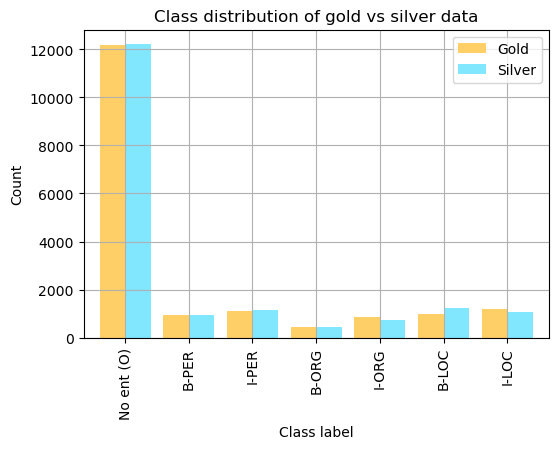

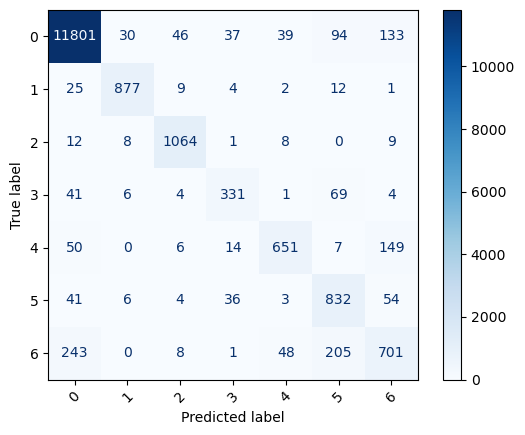

In [6]:
plotting_wikiann(results=combined_results_pd, silver = silver_data_list , gold_a = resultsA, gold_b = resultsB, colours=colors)

# Approach 2: create new silver data
Take a subset of the gold dataset FewNerd, train an NER tagger on it, and test the tagger on another subset of fewnerd, as well as the manual and silver annotations from approach 1, to get a thorough analysis

In [ ]:
#WARNING! This code block takes a while, and the data it creates is already available in the repository
data_processing(input_path=fewnerd_raw_data, output_path=fewnerd_processed_output)

## In the command line:
```
python -m spacy convert data-files_and_results/fewnerd_train.conll data-files_and_results/ -c ner #repeat for dev and test

python -m spacy init fill-config python_files/base_config.cfg python_files/spacy_config.cfg

python -m spacy train python_files/spacy_config.cfg --output python_files/spacy_output/ –-paths.train data-files_and_results/fewnerd_train.spacy --paths.dev data-files_and_results/fewnerd_dev.spacy

python -m spacy benchmark accuracy python_files/spacy_output/model-best data-files_and_results/fewnerd_test.spacy --output data-files_and_results/spacy_fewnerd_results.json
```

In [ ]:
with open("data-files_and_results/spacy_fewnerd_results.json", "r", encoding="utf-8") as f:
    results=f.read()
print(results.split(",")[4:7])